In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 401)
pd.set_option('display.max_colwidth', None)

In [3]:
ALLGGST = pd.read_csv('didnt want to put my local filepath here')

In [5]:
ALLGGST = ALLGGST.drop(columns=['Unnamed: 0'])

In [4]:
ALLGGST.shape

(517169, 25)

In [8]:
# ALLGGST['tournament start timestamp'] = pd.to_datetime(ALLGGST['tournament start timestamp'])

In [9]:
# ALLGGST.loc[ALLGGST['tournament online'] == True, ['tournament city', 'tournament state', 'tournament country']] = 'Online'


In [5]:
ALLGGST.tail(8)

,Unnamed: 0,set id,event id,player 1 name,player 1 id,player 1 seed,player 1 victory,player 1 wins,player 2 name,player 2 id,player 2 seed,player 2 victory,player 2 wins,winner id,winner placement,loser placement,tournament name,tournament online,ggst entrants,tournament num attendees,tournament city,tournament state,tournament country,tournament start timestamp,tournament id
517161,517161,35461415,554940,DiamondMew,1291347,10,False,1,Wedge,517325,3,True,2,517325,4,6,Salem Shutdown League | February 2021,True,11,55,Online,Online,Online,2021-02-01 13:00:00,268254
517162,517162,35460701,554940,DevilishTruthStare,1917830,9,True,2,Dr. Dre,1461149,4,False,1,1917830,9,10,Salem Shutdown League | February 2021,True,11,55,Online,Online,Online,2021-02-01 13:00:00,268254
517163,517163,35461428,554940,Jaxas,30008,1,False,0,AnEntireSkeleton,698994,6,True,2,698994,3,7,Salem Shutdown League | February 2021,True,11,55,Online,Online,Online,2021-02-01 13:00:00,268254
517164,517164,35460700,554940,AnEntireSkeleton,698994,6,False,0,UnHawk,708049,7,True,2,708049,1,3,Salem Shutdown League | February 2021,True,11,55,Online,Online,Online,2021-02-01 13:00:00,268254
517165,517165,35459433,554940,DiamondMew,1291347,10,True,2,Jaxas,30008,1,False,0,1291347,6,7,Salem Shutdown League | February 2021,True,11,55,Online,Online,Online,2021-02-01 13:00:00,268254
517166,517166,35459435,554940,UnHawk,708049,7,True,2,Dr. Dre,1461149,4,False,0,708049,1,10,Salem Shutdown League | February 2021,True,11,55,Online,Online,Online,2021-02-01 13:00:00,268254
517167,517167,35459270,554940,AnEntireSkeleton,698994,6,True,2,DevilishTruthStare,1917830,9,False,0,698994,3,9,Salem Shutdown League | February 2021,True,11,55,Online,Online,Online,2021-02-01 13:00:00,268254
517168,517168,35459134,554940,Jaxas,30008,1,False,0,UnHawk,708049,7,True,2,708049,1,7,Salem Shutdown League | February 2021,True,11,55,Online,Online,Online,2021-02-01 13:00:00,268254


In [12]:
# Last2WeeksData = Last2WeeksData.drop(columns=['Unnamed: 0'])

In [13]:
# Last2WeeksData.shape

In [14]:
# Last2WeeksData['tournament start timestamp'] = pd.to_datetime(Last2WeeksData['tournament start timestamp'])

In [15]:
# ALLGGST = pd.concat([Last2WeeksData, ALLGGST], ignore_index=True)

In [38]:
ALLGGST.shape

(517169, 24)

In [17]:
# Merging GOBOU's IDs

ALLGGST.loc[ALLGGST['player 1 id'] == 3953901, 'player 1 id'] = 2354940
ALLGGST.loc[ALLGGST['player 2 id'] == 3953901, 'player 2 id'] = 2354940


In [19]:
# Majors = ALLGGST[(ALLGGST['ggst entrants'] > 150) & (ALLGGST['tournament online'] == False)].drop_duplicates(subset='tournament name', keep='first')
# print(Majors.shape)
# Majors


In [20]:
# searchtourneyname = ALLGGST[ALLGGST['tournament name'].str.contains('Brussels Challenge')].drop_duplicates(subset='tournament name', keep='first')

# searchtourneyname

In [21]:
# Majors_id_list = [
#     592000,
#     559646,
#     523946,
#     509187,
#     501094,
#     496990,
#     479722,
#     455300,
#     426276,
#     415239,
#     420679,
#     310946,
#     289645,
#     461142,
#     531306,
#     576360,
#     446431,
#     528179,
#     417593,
#     523155,
#     533025,
#     626339
# ] # this is all including emea

Majors_id_list = [
    592000,
    559646,
    523946,
    509187,
    501094,
    496990,
    479722,
    455300,
    426276,
    415239,
    420679,
    310946,
    289645,
    626339
] # this is only the recognized big majors

In [22]:
Majors_data = ALLGGST[ALLGGST['tournament id'].isin(Majors_id_list)]

Majors_data = Majors_data[~(Majors_data['event id'] == 1054191)]

print(Majors_data.shape)
  
Majors_data.sample(20)

(22079, 24)


,set id,event id,player 1 name,player 1 id,player 1 seed,player 1 victory,player 1 wins,player 2 name,player 2 id,player 2 seed,player 2 victory,player 2 wins,winner id,winner placement,loser placement,tournament name,tournament online,ggst entrants,tournament num attendees,tournament city,tournament state,tournament country,tournament start timestamp,tournament id
109956,63483360,864724,Nocturno999,359184,1934,False,1,WoRR,40108,910,True,3,40108,385,1025,Evo 2023,False,2474,11064,Las Vegas,NV,US,2023-08-04 10:00:00,523946
84704,65524691,929005,PAR | Aarondamac,543662,1,True,3,9Moons | TestYourLuck,689427,32,False,0,543662,9,33,CEOtaku 2023,False,386,1751,Online,FL,US,2023-09-22 11:00:00,559646
112355,63464983,864724,Grey moon | PossiblyZack,2602010,1703,False,0,WTT | GLIZZYGOBBLER,2195627,678,True,3,2195627,385,1025,Evo 2023,False,2474,11064,Las Vegas,NV,US,2023-08-04 10:00:00,523946
377699,44136100,612107,OH!KneeSan,138747,86,True,3,BWR | Loxe,243844,363,False,0,138747,33,129,Frosty Faustings XIV 2022,False,731,2797,Lombard,IL,US,2022-01-28 13:00:00,310946
293636,50361890,690062,iAlekz,667142,2139,False,0,Damascus,725119,615,True,3,725119,193,513,Evo 2022,False,2158,5045,Las Vegas,NV,US,2022-08-05 11:00:00,426276
294095,50346959,690062,bc | Lord Knight,148642,43,True,3,WooThePoo,1903383,982,False,0,148642,49,1025,Evo 2022,False,2158,5045,Las Vegas,NV,US,2022-08-05 11:00:00,426276
265454,52258933,739861,Rise | Nitro,1274962,22,True,3,beanibee,2410344,235,False,0,1274962,33,257,CEOtaku 2022,False,529,1616,Online,FL,US,2022-09-23 11:00:00,455300
112255,63465901,864724,Bluprint4,284208,427,True,3,Jagger,812318,2132,False,0,284208,385,513,Evo 2023,False,2474,11064,Las Vegas,NV,US,2023-08-04 10:00:00,523946
394498,42958741,578966,TempestNYC,504187,8,True,3,Splash | Idiosyncrasy,483476,5,False,0,504187,5,7,CEO 2021 Fighting Game Championships,False,748,3435,Orlando,FL,US,2021-12-03 12:00:00,289645
293089,50372783,690062,Brip 'n Rip,738713,1535,False,1,ohko,1013484,1538,True,3,1013484,1025,1537,Evo 2022,False,2158,5045,Las Vegas,NV,US,2022-08-05 11:00:00,426276


################################

# Top GGST Players by WIN RATE at Offline Tournaments

################################

In [24]:
# TOP N PLAYERS IN THE MAJORS BY WINRATE


offline_data = FINAL_DATA[FINAL_DATA['tournament online'] == False]
offline_data = Majors_data

win_counts = offline_data['winner id'].value_counts().rename('win_count')

loss_counts_1 = offline_data[offline_data['winner id'] != offline_data['player 1 id']]['player 1 id'].value_counts()
loss_counts_2 = offline_data[offline_data['winner id'] != offline_data['player 2 id']]['player 2 id'].value_counts()
loss_counts = loss_counts_1.add(loss_counts_2, fill_value=0).rename('loss_count')

win_loss_counts_df = pd.DataFrame({'Total Set Wins': win_counts, 'Total Set Losses': loss_counts}).fillna(0)

win_loss_counts_df['Total Sets Played'] = win_loss_counts_df['Total Set Wins'] + win_loss_counts_df['Total Set Losses']

eligible_players = win_loss_counts_df[win_loss_counts_df['Total Set Losses'] > 4.0]

eligible_players['Win Rate'] = eligible_players['Total Set Wins'] / eligible_players['Total Sets Played']

player_names = pd.concat([
    offline_data[['player 1 id', 'player 1 name']].rename(columns={'player 1 id': 'player id', 'player 1 name': 'Player Name(s)'}),
    offline_data[['player 2 id', 'player 2 name']].rename(columns={'player 2 id': 'player id', 'player 2 name': 'Player Name(s)'})
])

player_names_grouped = player_names.groupby('player id')['Player Name(s)'].apply(lambda names: '/'.join(names.drop_duplicates()))

eligible_players = eligible_players.reset_index().rename(columns={'index': 'Player ID'})

top_players = eligible_players.merge(player_names_grouped, how='left', left_on='Player ID', right_index=True)

top_players = top_players.sort_values('Win Rate', ascending=False).reset_index(drop=True)
top_players.index = top_players.index + 1

top_players['Placement'] = top_players['Win Rate'].rank(method='min', ascending=False).astype(int)

top_players = top_players[['Player ID', 'Placement', 'Player Name(s)', 'Win Rate', 'Total Set Wins', 'Total Set Losses', 'Total Sets Played']]
print(top_players.shape)
top_players.head(100)

C:\Users\nickh\AppData\Local\Temp\ipykernel_7244\3124857050.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_players['Win Rate'] = eligible_players['Total Set Wins'] / eligible_players['Total Sets Played']


(850, 7)


,Player ID,Placement,Player Name(s),Win Rate,Total Set Wins,Total Set Losses,Total Sets Played
1,504187,1,FLY | TempestNYC/FLY M.RAGE | TempestNYC/TempestNYC/M&I | TempestNYC,0.853211,93.0,16.0,109.0
2,2346211,2,M.RAGE | UMISHO/UMISHO/Razer | UMISHO,0.846154,77.0,14.0,91.0
3,649197,3,Twis | Slash/ANKAA | Slash,0.823529,56.0,12.0,68.0
4,1872282,4,NASR | Latif,0.809524,34.0,8.0,42.0
5,2334193,5,Bean,0.807692,42.0,10.0,52.0
6,4465,6,TSM | Leffen/Leffen,0.807229,67.0,16.0,83.0
7,137289,7,MarlinPie/PANDA | MarlinPie,0.806452,25.0,6.0,31.0
8,840002,7,Dejojo,0.806452,25.0,6.0,31.0
9,21591,9,Moist | Hotashi/Hotashi,0.805825,83.0,20.0,103.0
10,152638,10,9Moons | Remi Celeste/Remi Celeste,0.800000,24.0,6.0,30.0


In [25]:
# # Create a temporary column 'min_player_id' with the minimum of 'player 1 id' and 'player 2 id'
# ALLGGST['min_player_id'] = ALLGGST[['player 1 id', 'player 2 id']].min(axis=1)

# # Sort the DataFrame by 'min_player_id'
# ALLGGST_sorted = ALLGGST.sort_values(by='min_player_id')

# # Drop duplicates based on 'min_player_id', keeping only the first instance
# ALLGGST_sorted_unique = ALLGGST_sorted.drop_duplicates(subset='min_player_id', keep='first')

# # Optionally, you can drop the 'min_player_id' column if it's no longer needed
# ALLGGST.drop(columns='min_player_id', inplace=True)


# ALLGGST_sorted_unique.head(5) 

In [26]:
# # Concatenate player names and IDs from both 'player 1' and 'player 2' columns
# player_names_ids = pd.concat([
#     ALLGGST[['player 1 id', 'player 1 name']].rename(columns={'player 1 id': 'player id', 'player 1 name': 'player name'}),
#     ALLGGST[['player 2 id', 'player 2 name']].rename(columns={'player 2 id': 'player id', 'player 2 name': 'player name'})
# ])

# # Group by 'player id' and join the unique player names associated with each ID
# grouped_players = player_names_ids.groupby('player id')['player name'].apply(lambda x: '/'.join(x.unique())).reset_index()

# # Sort by 'player id'
# sorted_grouped_players = grouped_players.sort_values(by='player id').reset_index(drop=True)
# sorted_grouped_players.index = sorted_grouped_players.index + 1

# sorted_grouped_players.head(50)


In [27]:
# Player Search
player_search = Majors_data[
    (Majors_data['player 1 name'].str.contains('MenaRD', case=False)) | (Majors_data['player 2 name'].str.contains('MenaRD', case=False))
].drop_duplicates(subset='tournament name', keep='first')

print(player_search.shape)
player_search

(3, 24)


,set id,event id,player 1 name,player 1 id,player 1 seed,player 1 victory,player 1 wins,player 2 name,player 2 id,player 2 seed,player 2 victory,player 2 wins,winner id,winner placement,loser placement,tournament name,tournament online,ggst entrants,tournament num attendees,tournament city,tournament state,tournament country,tournament start timestamp,tournament id
291823,50403423,690062,Bandits | MenaRD,224650,63,False,1,Inspector Lee,313551,831,True,3,313551,769,1025,Evo 2022,False,2158,5045,Las Vegas,NV,US,2022-08-05 11:00:00,426276
313838,48911262,672287,Juicy | MFCR,1436932,11,True,3,Bandits | MenaRD,224650,17,False,2,1436932,9,17,CEO 2022 Fighting Game Championships,False,559,2968,Daytona Beach,FL,US,2022-06-24 09:00:00,415239
326532,47859490,680696,Bandits | MenaRD,224650,35,False,2,Nerf | 9moons Shine,220002,26,True,3,220002,17,25,COMBO BREAKER 2022,False,1056,2968,Schaumburg,IL,US,2022-05-27 10:00:00,420679


In [28]:
# # Player Search by ID

player_search = Majors_data[
    (Majors_data['player 1 id'] == 2090751) | (Majors_data['player 2 id'] == 2090751)
]

print(player_search.shape)
player_search

(81, 24)


,set id,event id,player 1 name,player 1 id,player 1 seed,player 1 victory,player 1 wins,player 2 name,player 2 id,player 2 seed,player 2 victory,player 2 wins,winner id,winner placement,loser placement,tournament name,tournament online,ggst entrants,tournament num attendees,tournament city,tournament state,tournament country,tournament start timestamp,tournament id
25796,70067813,997768,Eddventure,2090751,13,False,1,HonoredOgre,2409666,40,True,3,2409666,13,17,Frosty Faustings XVI 2024,False,719,3670,Lombard,IL,US,2024-01-25 13:00:00,592000
25824,70067693,997768,ONi | Tiger_Pop,1197092,4,True,3,Eddventure,2090751,13,False,2,1197092,7,17,Frosty Faustings XVI 2024,False,719,3670,Lombard,IL,US,2024-01-25 13:00:00,592000
25842,70062302,997768,Eddventure,2090751,13,True,3,Moist | Hotashi,21591,20,False,0,2090751,17,17,Frosty Faustings XVI 2024,False,719,3670,Lombard,IL,US,2024-01-25 13:00:00,592000
25929,70062299,997768,Eddventure,2090751,13,True,3,JIG | kedako,217022,52,False,0,2090751,17,33,Frosty Faustings XVI 2024,False,719,3670,Lombard,IL,US,2024-01-25 13:00:00,592000
26810,69949634,997768,Eddventure,2090751,13,True,3,calamarikurusu,1588499,141,False,2,2090751,17,97,Frosty Faustings XVI 2024,False,719,3670,Lombard,IL,US,2024-01-25 13:00:00,592000
26843,69949632,997768,Eddventure,2090751,13,True,3,Jack,3221192,269,False,0,2090751,17,193,Frosty Faustings XVI 2024,False,719,3670,Lombard,IL,US,2024-01-25 13:00:00,592000
26907,69949628,997768,Eddventure,2090751,13,True,3,GM | Pasty,63592,500,False,0,2090751,17,385,Frosty Faustings XVI 2024,False,719,3670,Lombard,IL,US,2024-01-25 13:00:00,592000
84637,65582181,929005,PAR | Eddventure,2090751,12,False,1,FG | Marvelo,66010,18,True,3,66010,13,17,CEOtaku 2023,False,386,1751,Online,FL,US,2023-09-22 11:00:00,559646
84674,65524702,929005,Cheryo,1911494,28,True,3,PAR | Eddventure,2090751,12,False,1,1911494,3,17,CEOtaku 2023,False,386,1751,Online,FL,US,2023-09-22 11:00:00,559646
84697,65524698,929005,PAR | Eddventure,2090751,12,True,3,NH | Kermit,226251,21,False,1,2090751,17,33,CEOtaku 2023,False,386,1751,Online,FL,US,2023-09-22 11:00:00,559646


In [29]:
# entrantnumbers = ALLGGST[ALLGGST['tournament id'].isin(Majors_id_list)].drop_duplicates(subset='tournament name', keep='first')

# entrantnumbers                        

################################

# Top GGST Players by MEDIAN Placement at Offline Tournaments

################################

In [30]:
unique_placements = []

for index, row in Majors_data.iterrows():
    loser_id = row['player 2 id'] if row['winner id'] == row['player 1 id'] else row['player 1 id']

    unique_placements.append({'player id': row['winner id'], 'tournament id': row['tournament id'], 'placement': row['winner placement']})

    unique_placements.append({'player id': loser_id, 'tournament id': row['tournament id'], 'placement': row['loser placement']})

placements_df = pd.DataFrame(unique_placements)

placements_df = placements_df.drop_duplicates()

median_placements = placements_df.groupby('player id')['placement'].median().rename('Median Placement')
tournament_counts = placements_df.groupby('player id')['tournament id'].nunique().rename('Majors Attended')


offline_data = Majors_data

win_counts = offline_data['winner id'].value_counts().rename('win_count')

loss_counts_1 = offline_data[offline_data['winner id'] != offline_data['player 1 id']]['player 1 id'].value_counts()
loss_counts_2 = offline_data[offline_data['winner id'] != offline_data['player 2 id']]['player 2 id'].value_counts()
loss_counts = loss_counts_1.add(loss_counts_2, fill_value=0).rename('loss_count')

win_loss_counts_df = pd.DataFrame({'Total Set Wins': win_counts, 'Total Set Losses': loss_counts}).fillna(0)

win_loss_counts_df['Total Sets Played'] = win_loss_counts_df['Total Set Wins'] + win_loss_counts_df['Total Set Losses']

eligible_players = win_loss_counts_df[win_loss_counts_df['Total Sets Played'] > 10]

eligible_players['Win Rate'] = eligible_players['Total Set Wins'] / eligible_players['Total Sets Played']

player_names = pd.concat([
    offline_data[['player 1 id', 'player 1 name']].rename(columns={'player 1 id': 'player id', 'player 1 name': 'Player Name(s)'}),
    offline_data[['player 2 id', 'player 2 name']].rename(columns={'player 2 id': 'player id', 'player 2 name': 'Player Name(s)'})
])

player_names_grouped = player_names.groupby('player id')['Player Name(s)'].apply(lambda names: '/'.join(names.drop_duplicates()))

eligible_players = eligible_players.reset_index().rename(columns={'index': 'Player ID'})

top_players = eligible_players.merge(player_names_grouped, how='left', left_on='Player ID', right_index=True)

top_players = top_players.sort_values('Win Rate', ascending=False).reset_index(drop=True)
top_players.index = top_players.index + 1


top_players = top_players.merge(median_placements, how='left', left_on='Player ID', right_index=True)


top_players = top_players.merge(tournament_counts, how='left', left_on='Player ID', right_index=True)


top_players = top_players.sort_values(by='Median Placement', ascending=True)

top_players = top_players[top_players['Majors Attended'] > 2]

top_players['Rank'] = top_players['Median Placement'].rank(method='min', ascending=True).astype(int)

top_players = top_players[['Player ID', 'Rank', 'Player Name(s)', 'Median Placement', 'Win Rate', 'Majors Attended', 'Total Set Wins', 'Total Set Losses', 'Total Sets Played']]



print(top_players.shape)
top_players.head(200)


C:\Users\nickh\AppData\Local\Temp\ipykernel_7244\1502001199.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_players['Win Rate'] = eligible_players['Total Set Wins'] / eligible_players['Total Sets Played']


(675, 9)


,Player ID,Rank,Player Name(s),Median Placement,Win Rate,Majors Attended,Total Set Wins,Total Set Losses,Total Sets Played
1,504187,1,FLY | TempestNYC/FLY M.RAGE | TempestNYC/TempestNYC/M&I | TempestNYC,3.0,0.853211,11,93.0,16.0,109.0
8,649197,2,Twis | Slash/ANKAA | Slash,3.5,0.823529,6,56.0,12.0,68.0
3,2346211,3,M.RAGE | UMISHO/UMISHO/Razer | UMISHO,4.0,0.846154,9,77.0,14.0,91.0
18,4465,3,TSM | Leffen/Leffen,4.0,0.807229,9,67.0,16.0,83.0
24,378444,5,PAR | Daru_I-No/Daru_I-No,4.5,0.794872,4,31.0,8.0,39.0
2,2303771,6,Solo | Verix,5.0,0.851852,3,23.0,4.0,27.0
40,2670154,7,NBNHMR/ONi | NBNHMR,7.0,0.781250,8,50.0,14.0,64.0
25,624398,7,Zando/ATMO | Zando/BowBro | Zando,7.0,0.790123,8,64.0,17.0,81.0
17,2334193,7,Bean,7.0,0.807692,5,42.0,10.0,52.0
65,141070,7,PepperySplash,7.0,0.754386,7,43.0,14.0,57.0


################################

# Top GGST Players by MEAN Placement at Offline Tournaments

################################

In [31]:
# TRUNCATED MEAN BOTTOM 1 if over 193

def truncated_mean(placements):
    if len(placements) <= 2:
        return placements.mean()
    else:
        sorted_placements = sorted(placements)
        return pd.Series(sorted_placements[:-1]).mean()
            
unique_placements = []

for index, row in Majors_data.iterrows():
    loser_id = row['player 2 id'] if row['winner id'] == row['player 1 id'] else row['player 1 id']

    unique_placements.append({'player id': row['winner id'], 'tournament id': row['tournament id'], 'placement': row['winner placement']})

    unique_placements.append({'player id': loser_id, 'tournament id': row['tournament id'], 'placement': row['loser placement']})

placements_df = pd.DataFrame(unique_placements)

placements_df = placements_df.drop_duplicates()

tournament_counts = placements_df.groupby('player id')['tournament id'].nunique().rename('Majors Attended')



truncated_mean_placements = placements_df.groupby('player id')['placement'].apply(truncated_mean).rename('Mean Placement')


# offline_data = FINAL_DATA[FINAL_DATA['tournament online'] == False]
offline_data = Majors_data

win_counts = offline_data['winner id'].value_counts().rename('win_count')

loss_counts_1 = offline_data[offline_data['winner id'] != offline_data['player 1 id']]['player 1 id'].value_counts()
loss_counts_2 = offline_data[offline_data['winner id'] != offline_data['player 2 id']]['player 2 id'].value_counts()
loss_counts = loss_counts_1.add(loss_counts_2, fill_value=0).rename('loss_count')

win_loss_counts_df = pd.DataFrame({'Total Set Wins': win_counts, 'Total Set Losses': loss_counts}).fillna(0)

win_loss_counts_df['Total Sets Played'] = win_loss_counts_df['Total Set Wins'] + win_loss_counts_df['Total Set Losses']

eligible_players = win_loss_counts_df[win_loss_counts_df['Total Sets Played'] > 2]

eligible_players['Win Rate'] = eligible_players['Total Set Wins'] / eligible_players['Total Sets Played']

player_names = pd.concat([
    offline_data[['player 1 id', 'player 1 name']].rename(columns={'player 1 id': 'player id', 'player 1 name': 'Player Name(s)'}),
    offline_data[['player 2 id', 'player 2 name']].rename(columns={'player 2 id': 'player id', 'player 2 name': 'Player Name(s)'})
])

player_names_grouped = player_names.groupby('player id')['Player Name(s)'].apply(lambda names: '/'.join(names.drop_duplicates()))

eligible_players = eligible_players.reset_index().rename(columns={'index': 'Player ID'})

top_players = eligible_players.merge(player_names_grouped, how='left', left_on='Player ID', right_index=True)

top_players = top_players.sort_values('Win Rate', ascending=False).reset_index(drop=True)
top_players.index = top_players.index + 1

top_players = top_players.merge(truncated_mean_placements, how='left', left_on='Player ID', right_index=True)

top_players = top_players.merge(tournament_counts, how='left', left_on='Player ID', right_index=True)

top_players = top_players.sort_values(by='Mean Placement', ascending=True)

top_players = top_players[top_players['Majors Attended'] > 2]

top_players['Rank'] = top_players['Mean Placement'].rank(method='min', ascending=True).astype(int)

top_players = top_players[['Player ID', 'Rank', 'Player Name(s)', 'Mean Placement', 'Win Rate', 'Majors Attended', 'Total Set Wins', 'Total Set Losses', 'Total Sets Played']]



print(top_players.shape)
top_players.head(200)

C:\Users\nickh\AppData\Local\Temp\ipykernel_7244\2134359632.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_players['Win Rate'] = eligible_players['Total Set Wins'] / eligible_players['Total Sets Played']


(855, 9)


,Player ID,Rank,Player Name(s),Mean Placement,Win Rate,Majors Attended,Total Set Wins,Total Set Losses,Total Sets Played
6,2303771,1,Solo | Verix,3.000000,0.851852,3,23.0,4.0,27.0
14,649197,1,Twis | Slash/ANKAA | Slash,3.000000,0.823529,6,56.0,12.0,68.0
5,504187,3,FLY | TempestNYC/FLY M.RAGE | TempestNYC/TempestNYC/M&I | TempestNYC,3.700000,0.853211,11,93.0,16.0,109.0
42,378444,4,PAR | Daru_I-No/Daru_I-No,4.000000,0.794872,4,31.0,8.0,39.0
8,2346211,5,M.RAGE | UMISHO/UMISHO/Razer | UMISHO,4.625000,0.846154,9,77.0,14.0,91.0
24,4465,6,TSM | Leffen/Leffen,5.750000,0.807229,9,67.0,16.0,83.0
26,840002,7,Dejojo,7.000000,0.806452,3,25.0,6.0,31.0
83,1197092,7,ONi | Tiger_Pop/Tiger_Pop,7.000000,0.777778,4,28.0,8.0,36.0
23,2334193,9,Bean,7.250000,0.807692,5,42.0,10.0,52.0
44,624398,10,Zando/ATMO | Zando/BowBro | Zando,7.285714,0.790123,8,64.0,17.0,81.0


In [32]:
tourney2v2s = ALLGGST[ALLGGST['tournament name'].str.contains('2v2')].drop_duplicates(subset='tournament name', keep='first')

tourney2v2s

,set id,event id,player 1 name,player 1 id,player 1 seed,player 1 victory,player 1 wins,player 2 name,player 2 id,player 2 seed,player 2 victory,player 2 wins,winner id,winner placement,loser placement,tournament name,tournament online,ggst entrants,tournament num attendees,tournament city,tournament state,tournament country,tournament start timestamp,tournament id
18517,70770755,1056878,Sins of the Fauster,2947755,2,True,2,Venerated Valentines,778128,1,False,1,2947755,1,2,Bracket About Nothing - GGST 2v2 Valentine's Violence,True,32,76,Online,Online,Online,2024-02-13 20:00:00,627715
106033,63835147,956592,The Mexikens,2249266,2,True,2,No Sleep,2135484,3,False,0,2249266,1,2,Hackermans Can't Hurt You 17 - 2v2 Teams,True,27,62,Online,Online,Online,2023-08-12 15:00:00,574802
197949,57038063,859930,ShinKarp,687372,1,True,2,Virgin Losers: Eternal,1911494,3,False,0,687372,1,2,Valentine's Violence: a BAN 2v2 Bracket,True,32,68,Online,Online,Online,2023-02-14 20:00:00,521493
397323,42714499,652895,Kanza / Memokarp,687372,3,True,2,ThatPoorSod / Zin,1878012,6,False,0,687372,1,2,FGCC 2v2 Random Draft - December 2021,True,6,13,Online,Online,Online,2021-11-27 15:00:00,335810
402732,42301226,641388,ALDEN / Chaineru,397340,3,True,2,saf / Blazer,2204556,5,False,1,397340,1,2,SEA Salt GGST 2v2,True,14,29,Online,Online,Online,2021-11-12 23:00:00,329009
403029,42279152,641275,Lotus,2307909,2,True,2,Gorilas team,522919,1,False,1,2307909,1,2,TOS #5 Guilty Gear Strive Online Tournament 2v2 Team Battles (PS4),True,14,31,Online,Online,Online,2021-11-12 19:00:00,328717
407258,41885801,633237,SAKII / qFoolTV,2408370,5,True,2,Madlax / RTW,2450785,1,False,1,2408370,1,2,VL PC Guilty Gear Strive 2v2 Tournament,True,8,16,Online,Online,Online,2021-10-30 18:30:00,323892


######################################################


# FINDING 3-2 VS 3-1 VS 3-0 SET SCORES


######################################################

In [11]:
sets_3_2 = ALLGGST[((ALLGGST['player 1 wins'] == 3) & (ALLGGST['player 2 wins'] == 2)) | 
                   ((ALLGGST['player 1 wins'] == 2) & (ALLGGST['player 2 wins'] == 3))].shape[0]

sets_3_1_or_3_0 = ALLGGST[((ALLGGST['player 1 wins'] == 3) & (ALLGGST['player 2 wins'].isin([0, 1]))) | 
                          ((ALLGGST['player 2 wins'] == 3) & (ALLGGST['player 1 wins'].isin([0, 1])))].shape[0]

print(f"Sets that went 3-2: {sets_3_2}")
print(f"Sets that went 3-1 or 3-0: {sets_3_1_or_3_0}")

Sets that went 3-2: 79476
Sets that went 3-1 or 3-0: 363340


In [45]:
sets_3_2 = ALLGGST[((ALLGGST['player 1 wins'] == 3) & (ALLGGST['player 2 wins'] == 2)) | 
                   ((ALLGGST['player 1 wins'] == 2) & (ALLGGST['player 2 wins'] == 3))].shape[0]

sets_3_1 = ALLGGST[((ALLGGST['player 1 wins'] == 3) & (ALLGGST['player 2 wins'] == 1)) | 
                   ((ALLGGST['player 1 wins'] == 1) & (ALLGGST['player 2 wins'] == 3))].shape[0]

sets_3_0 = ALLGGST[((ALLGGST['player 1 wins'] == 3) & (ALLGGST['player 2 wins'] == 0)) | 
                   ((ALLGGST['player 1 wins'] == 0) & (ALLGGST['player 2 wins'] == 3))].shape[0]

print(f"Sets that went 3-2: {sets_3_2}")
print(f"Percentage of total: {(((sets_3_2) / (sets_3_2 + sets_3_1 + sets_3_0)) * 100):.2f}%")
print(" ")
print(f"Sets that went 3-1: {sets_3_1}")
print(f"Percentage of total: {(((sets_3_1) / (sets_3_2 + sets_3_1 + sets_3_0)) * 100):.2f}%")
print(" ")
print(f"Sets that went 3-0: {sets_3_0}")
print(f"Percentage of total: {(((sets_3_0) / (sets_3_2 + sets_3_1 + sets_3_0)) * 100):.2f}%")

Sets that went 3-2: 79476
Percentage of total: 17.95%
 
Sets that went 3-1: 132737
Percentage of total: 29.98%
 
Sets that went 3-0: 230603
Percentage of total: 52.08%


In [18]:
ALLGGST.dtypes

set id                         int64
event id                       int64
player 1 name                 object
player 1 id                    int64
player 1 seed                  int64
player 1 victory                bool
player 1 wins                  int64
player 2 name                 object
player 2 id                    int64
player 2 seed                  int64
player 2 victory                bool
player 2 wins                  int64
winner id                      int64
winner placement               int64
loser placement                int64
tournament name               object
tournament online               bool
ggst entrants                  int64
tournament num attendees       int64
tournament city               object
tournament state              object
tournament country            object
tournament start timestamp    object
tournament id                  int64
dtype: object

######################################################


# Bar Chart for Win Rates by Player Seed


######################################################

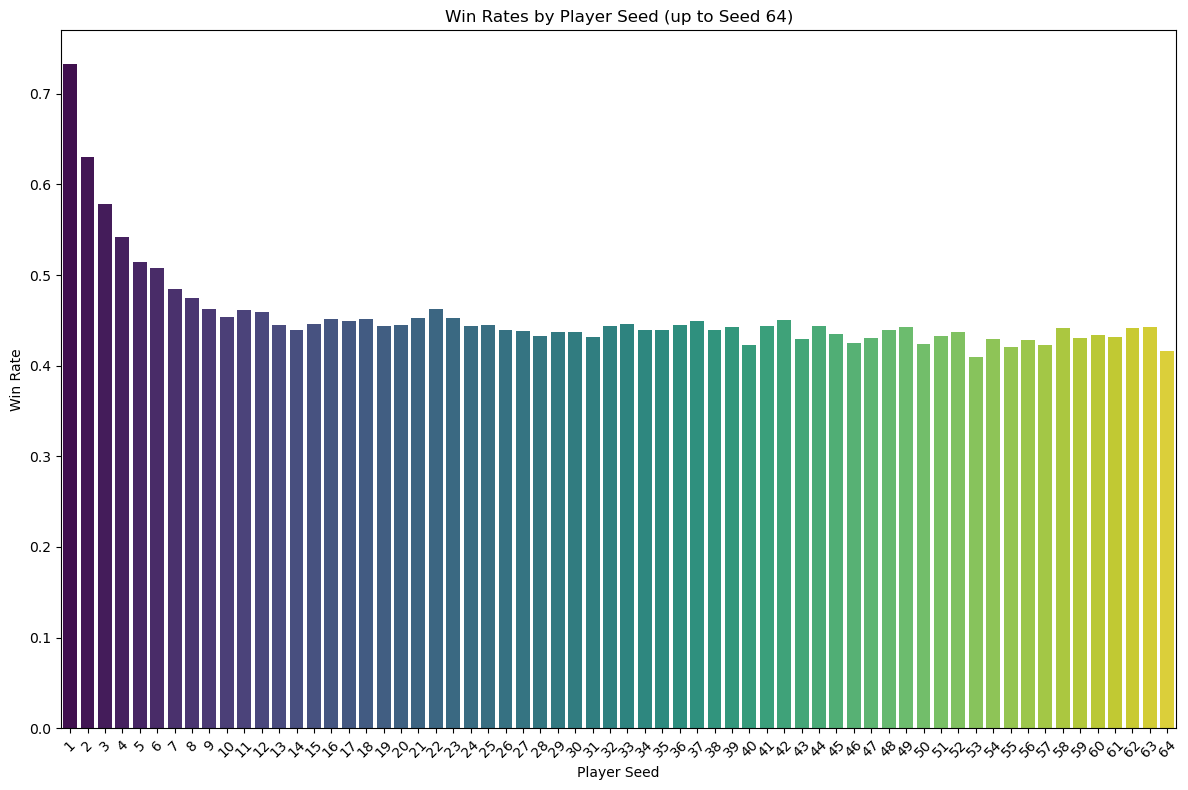

In [20]:
player1 = ALLGGST[['player 1 seed', 'player 1 victory']].rename(columns={'player 1 seed': 'seed', 'player 1 victory': 'victory'})
player2 = ALLGGST[['player 2 seed', 'player 2 victory']].rename(columns={'player 2 seed': 'seed', 'player 2 victory': 'victory'})

combined = pd.concat([player1, player2])

combined_filtered = combined[combined['seed'] <= 128]

seed_win_rates = combined_filtered.groupby('seed')['victory'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=seed_win_rates.index, y=seed_win_rates.values, palette="viridis")
plt.xlabel('Player Seed')
plt.ylabel('Win Rate')
plt.title('Win Rates by Player Seed (up to Seed 64)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##########################################

# Win Rates By Seed with Categorized Tournaments Based on GGST Entrants

##########################################

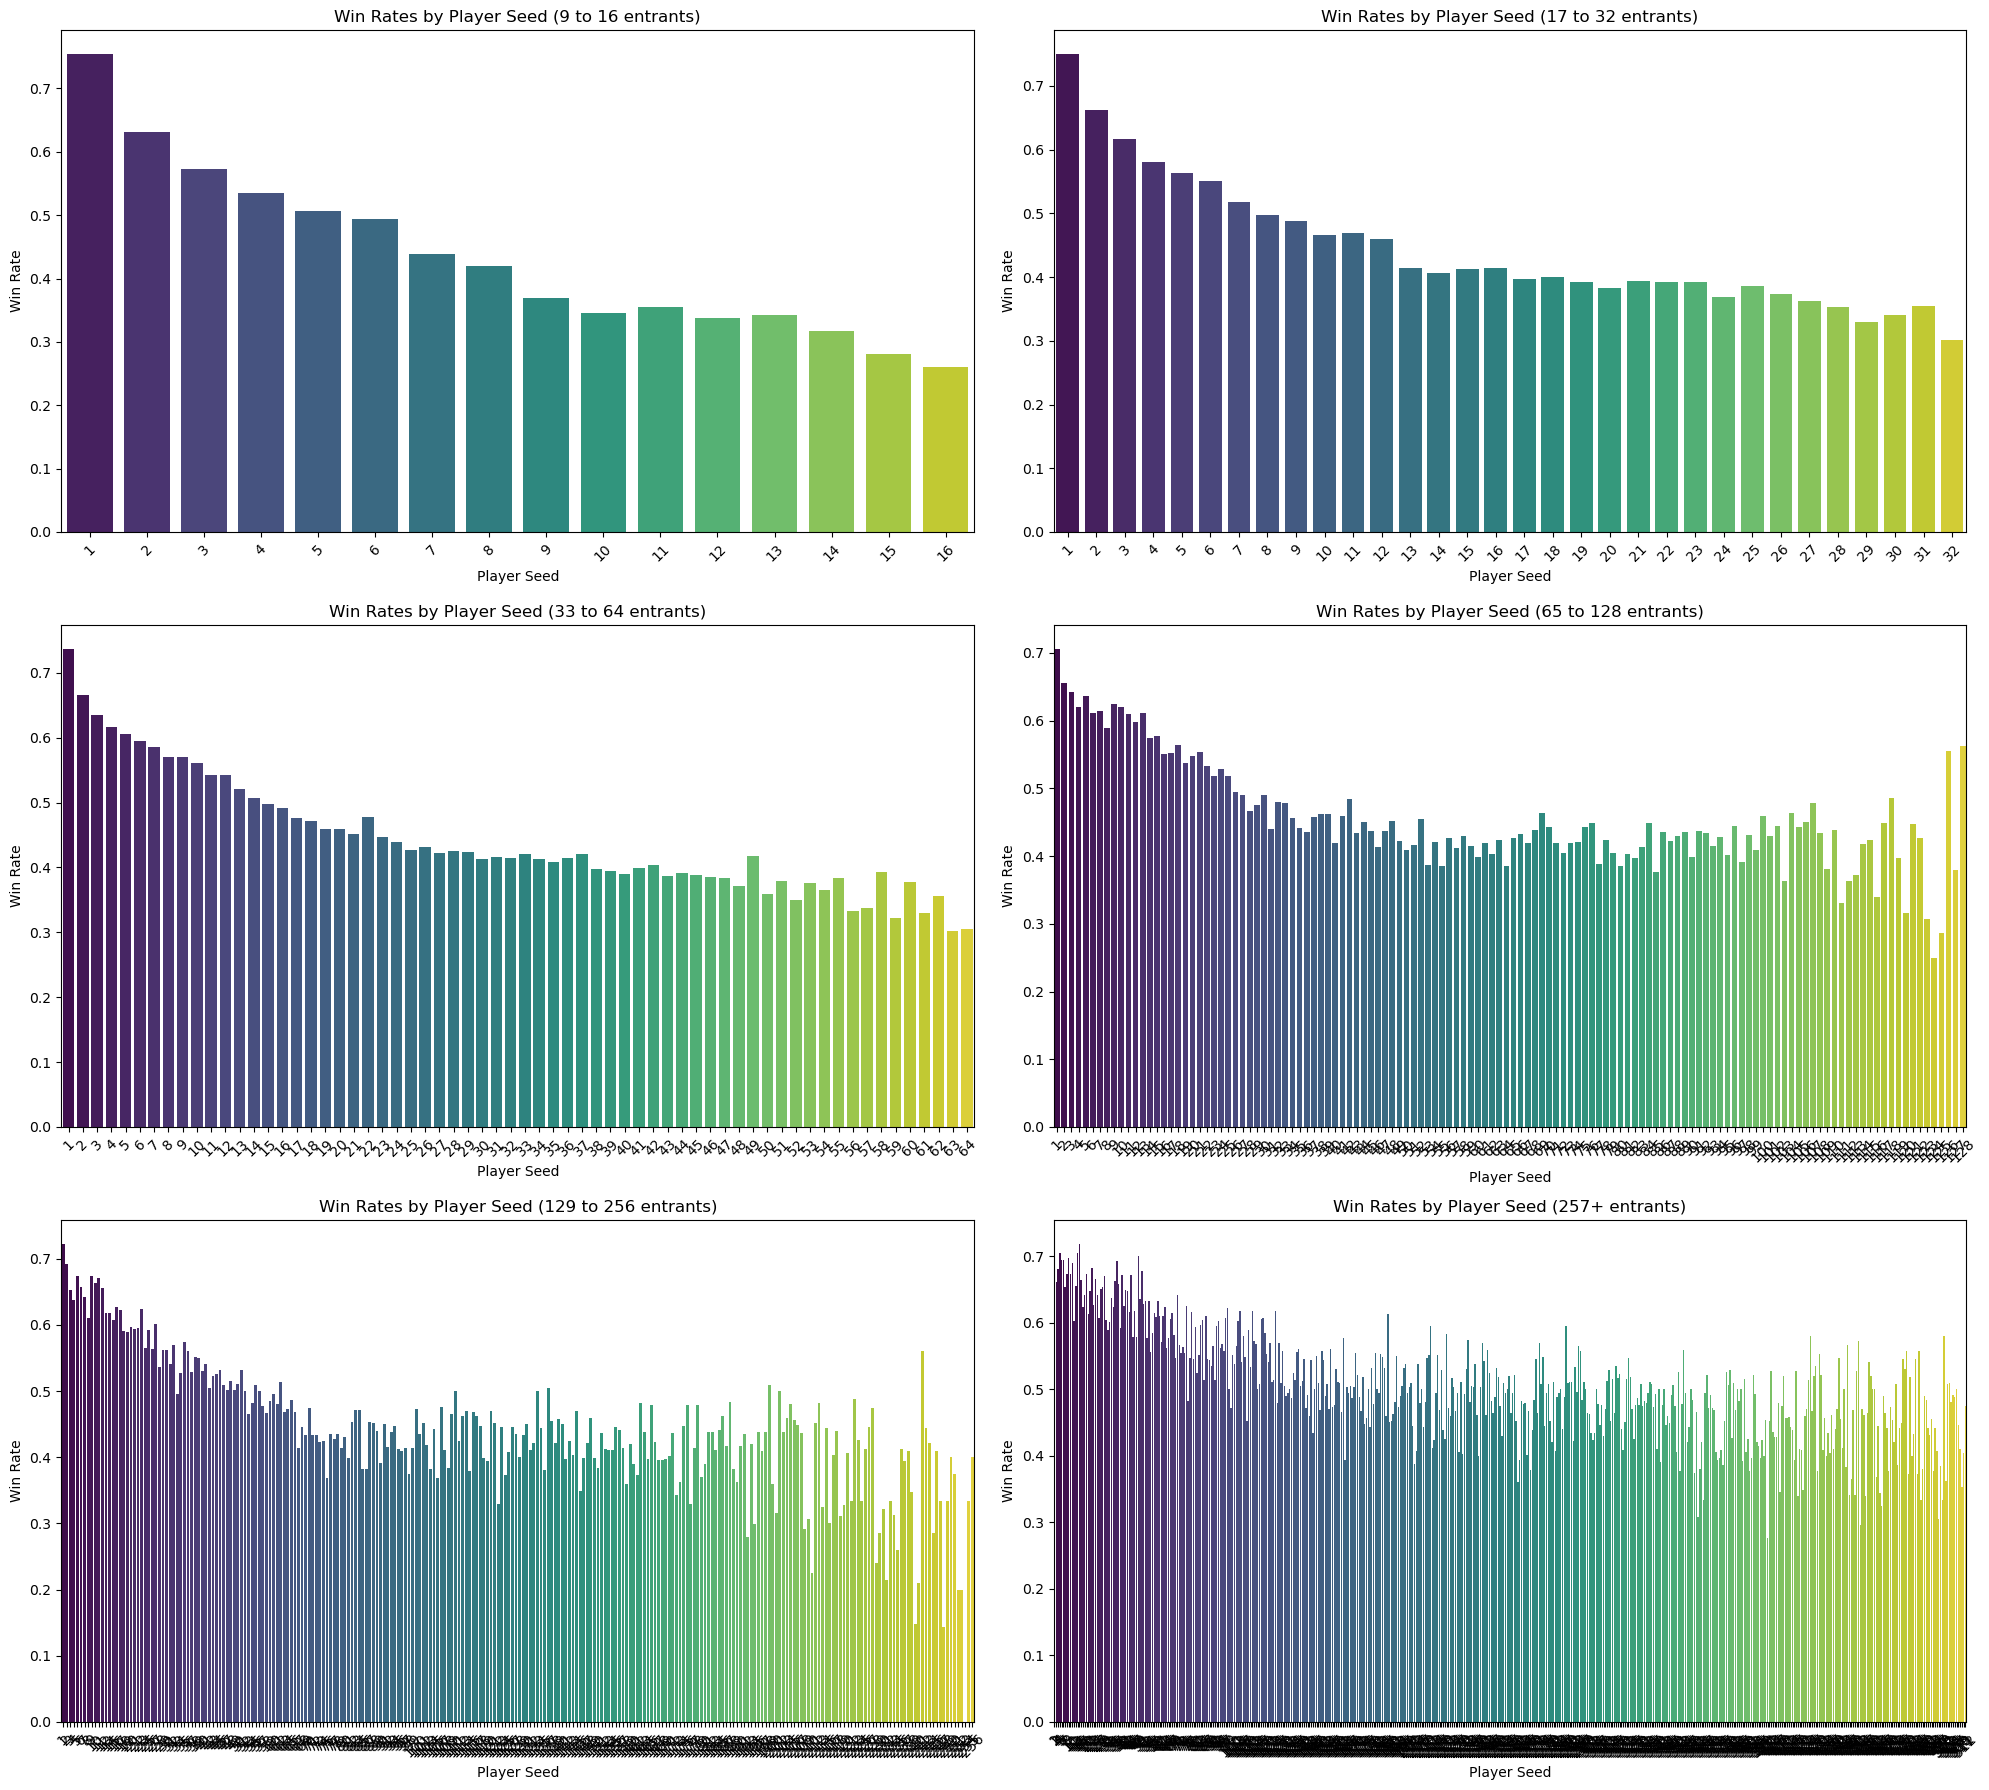

In [37]:
filtered_data = ALLGGST[ALLGGST['ggst entrants'] > 8]

# Define the categories based on 'ggst entrants'
categories = [
    (9, 16),
    (17, 32),
    (33, 64),
    (65, 128),
    (129, 256),
    (257, float('inf'))
]

category_labels = [
    '9 to 16 entrants',
    '17 to 32 entrants',
    '33 to 64 entrants',
    '65 to 128 entrants',
    '129 to 256 entrants',
    '257+ entrants'
]

# Combine player 1 and player 2 data
player1 = filtered_data[['player 1 seed', 'player 1 victory', 'ggst entrants']].rename(columns={'player 1 seed': 'seed', 'player 1 victory': 'victory'})
player2 = filtered_data[['player 2 seed', 'player 2 victory', 'ggst entrants']].rename(columns={'player 2 seed': 'seed', 'player 2 victory': 'victory'})

combined = pd.concat([player1, player2])

# Create a figure for the plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))
axes = axes.flatten()

for i, (low, high) in enumerate(categories):
    # Filter data for the current category
    category_data = combined[(combined['ggst entrants'] >= low) & (combined['ggst entrants'] <= high) & (combined['seed'] <= 512)]

    # Calculate win rates by player seed
    seed_win_rates = category_data.groupby('seed')['victory'].mean()

    # Plot the win rates
    sns.barplot(x=seed_win_rates.index, y=seed_win_rates.values, palette="viridis", ax=axes[i])
    axes[i].set_xlabel('Player Seed')
    axes[i].set_ylabel('Win Rate')
    axes[i].set_title(f'Win Rates by Player Seed ({category_labels[i]})')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##########################################

# Distribution of Placements Based on Seeding

##########################################

In [53]:
from rich.progress import Progress


placements_list = []

progress = Progress()

with progress:
    task = progress.add_task("[green]Processing rows...", total=len(ALLGGST))
    
    for index, row in ALLGGST.iterrows():
        if row['player 1 victory']:
            placements_list.append({
                'event id': row['event id'],
                'player id': row['player 1 id'],
                'seed': row['player 1 seed'],
                'placement': row['winner placement']
            })
            placements_list.append({
                'event id': row['event id'],
                'player id': row['player 2 id'],
                'seed': row['player 2 seed'],
                'placement': row['loser placement']
            })
        else:
            placements_list.append({
                'event id': row['event id'],
                'player id': row['player 2 id'],
                'seed': row['player 2 seed'],
                'placement': row['winner placement']
            })
            placements_list.append({
                'event id': row['event id'],
                'player id': row['player 1 id'],
                'seed': row['player 1 seed'],
                'placement': row['loser placement']
            })
        
        progress.advance(task)

placements = pd.DataFrame(placements_list)

placements.drop_duplicates(subset=['event id', 'player id'], inplace=True)

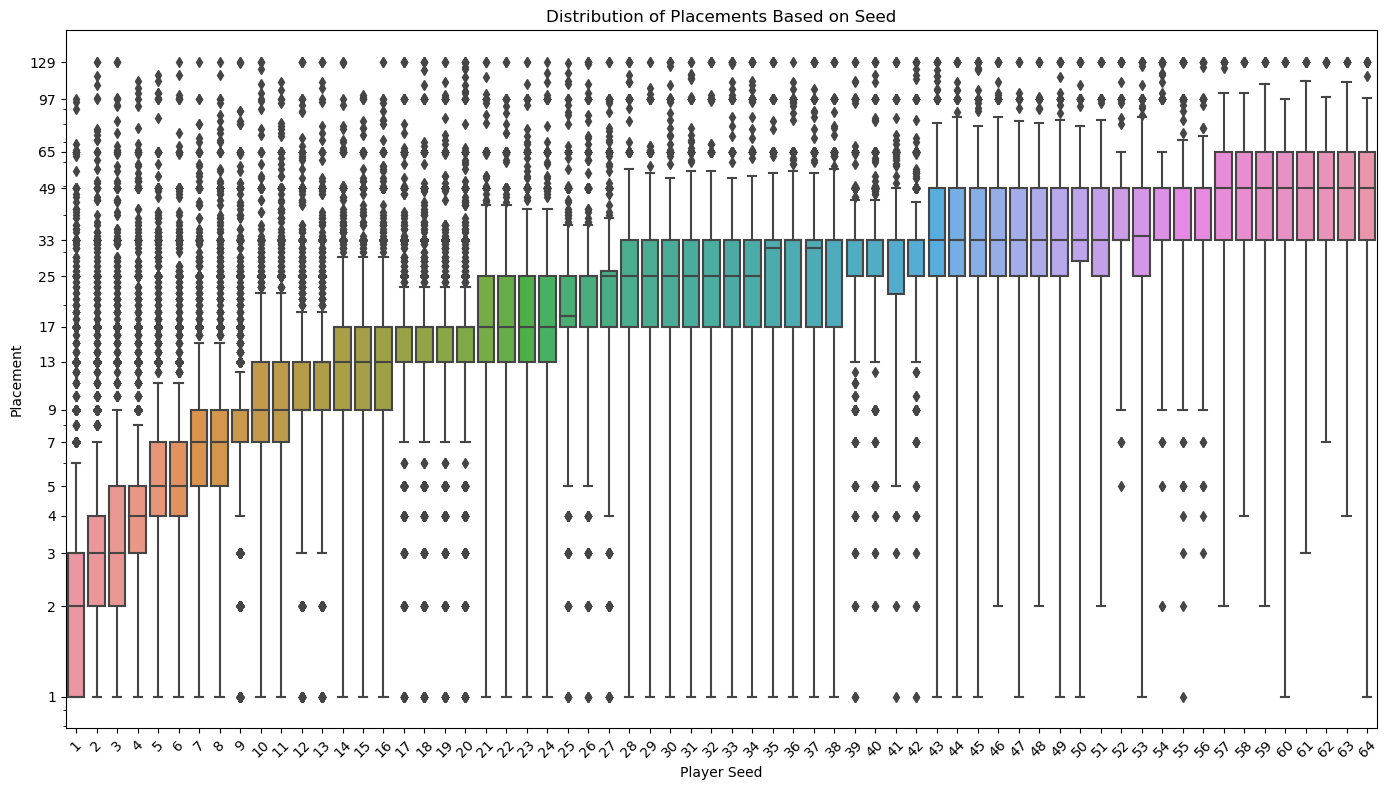

In [62]:
from matplotlib.ticker import FuncFormatter

placements = placements[(placements['seed'] <= 64) & (placements['placement'] <= 129)]

def custom_formatter(x, pos):
    if x in [1, 2, 3, 4, 5, 7, 9, 13, 17, 25, 33, 49, 65, 97, 129]:
        return f'{int(x)}'
    else:
        return ''

plt.figure(figsize=(14, 8))
sns.boxplot(x='seed', y='placement', data=placements)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_formatter))
plt.yticks([1, 2, 3, 4, 5, 7, 9, 13, 17, 25, 33, 49, 65, 97, 129])  # Set custom tick marks
plt.xlabel('Player Seed')
plt.ylabel('Placement')
plt.title('Distribution of Placements Based on Seed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()